<class 'pandas.core.indexes.datetimes.DatetimeIndex'> DatetimeIndex(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', freq='MS')
sales data:
<class 'numpy.ndarray'>

{'date': DatetimeIndex(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'

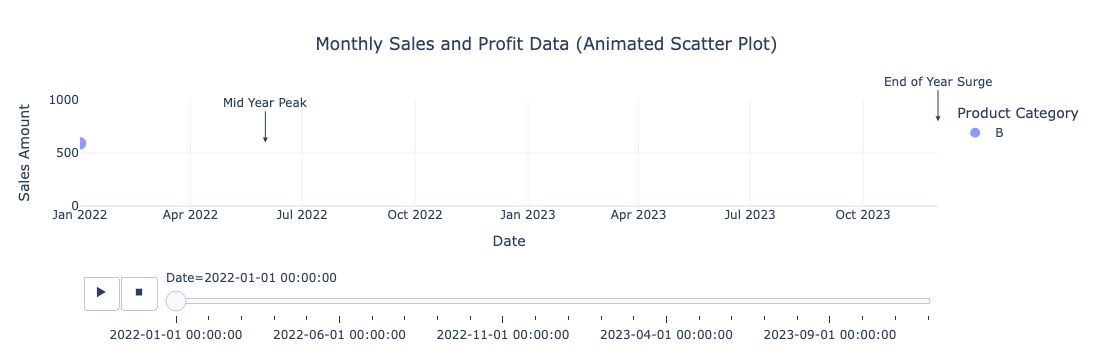

In [47]:
import pandas as pd
import numpy as np

# https://www.geeksforgeeks.org/animated-scatter-plots-in-plotly-for-time-series-data/

# Set the random seed for reproducibility
np.random.seed(42)

# Create a date range
date_range = pd.date_range(start='2022-01-01', end='2023-12-01', freq='MS')
print(type(date_range), date_range)

print("sales data:")
print(type(np.random.randint(100, 1000, size=len(date_range))))
print()

# Create a synthetic dataset
data = {
    'date': date_range,
    'sales': np.random.randint(100, 1000, size=len(date_range)),
    'profit': np.random.randint(10, 300, size=len(date_range)),  # New profit column
    'category': np.random.choice(['A', 'B', 'C'], size=len(date_range))
}
print(data)

df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

import plotly.express as px

# Create an animated scatter plot with additional features
fig = px.scatter(
    df,
    x='date',
    y='sales',
    animation_frame='date',
    color='category',
    size='profit',  # Use profit for marker size
    title='Monthly Sales and Profit Data (Animated Scatter Plot)',
    labels={'sales': 'Sales Amount', 'date': 'Date'},
    range_y=[0, 1000],
    range_x=[df['date'].min(), df['date'].max()],  # Ensure x-axis covers the full date range
    hover_name='category',  # Show category on hover
    hover_data={'profit': True, 'sales': True},  # Include profit in hover data
    template='plotly_white'  # Change the template for a different aesthetic
)

# Customize layout for better aesthetics
fig.update_layout(
    title_x=0.5,  # Center the title
    xaxis_title='Date',
    yaxis_title='Sales Amount',
    legend_title='Product Category',
    hovermode='closest',
    showlegend=True
)

# Add annotations for significant points if needed
annotations = [
    dict(x='2022-06-01', y=600, text='Mid Year Peak', showarrow=True, arrowhead=2, ax=0, ay=-40),
    dict(x='2023-12-01', y=800, text='End of Year Surge', showarrow=True, arrowhead=2, ax=0, ay=-40)
]

fig.update_layout(annotations=annotations)

# Show the plot
fig.show()

Animation by day

         date      GOOG      AAPL      AMZN        FB      NFLX      MSFT
0  2018-01-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
1  2018-01-08  1.018172  1.011943  1.061881  0.959968  1.053526  1.015988
2  2018-01-15  1.032008  1.019771  1.053240  0.970243  1.049860  1.020524
3  2018-01-22  1.066783  0.980057  1.140676  1.016858  1.307681  1.066561
4  2018-01-29  1.008773  0.917143  1.163374  1.018357  1.273537  1.040708
Date range:
Min: 2018-01-01
Max: 2019-12-30
Stock price range:
Min: 0.668718185644586
Max: 1.9576645850358452
         date company  stock_price  date_numeric
0  2018-01-01    GOOG     1.000000        736695
1  2018-01-08    GOOG     1.018172        736702
2  2018-01-15    GOOG     1.032008        736709
3  2018-01-22    GOOG     1.066783        736716
4  2018-01-29    GOOG     1.008773        736723


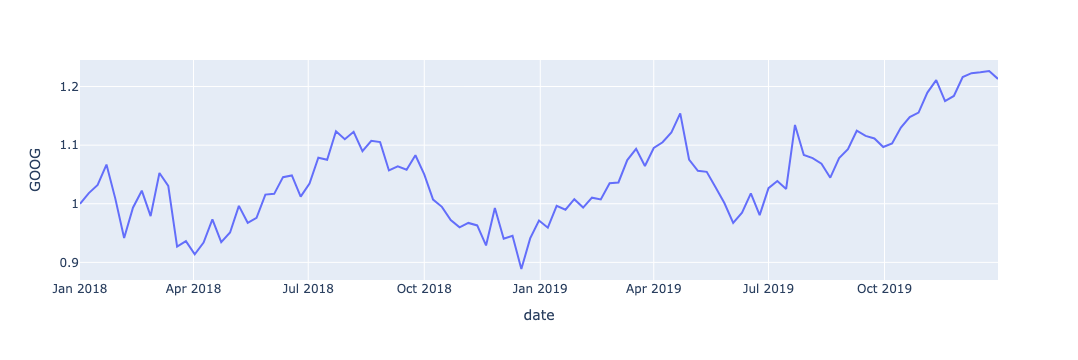

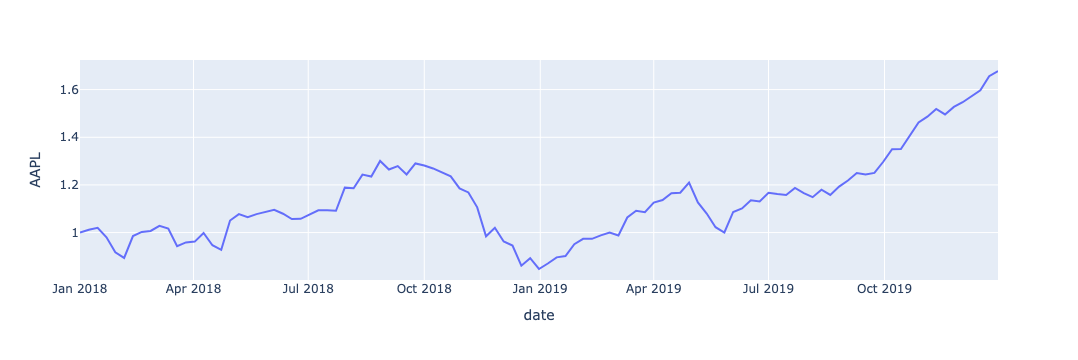

In [39]:
import plotly.express as px
import pandas as pd


df_stocks = px.data.stocks()
# print(df_stocks.head())

# Get stocks by day
df_melt = df_stocks.melt(id_vars=['date'], var_name='company', value_name='stock_price')
df_melt['date_numeric'] = pd.to_datetime(df_melt['date']).map(lambda x: x.toordinal()) #pd.to_datetime(df_melt['date']).astype('int64') 

print(df_stocks.head())

print("Date range:")
print("Min:", df_melt['date'].min())
print("Max:", df_melt['date'].max())

print("Stock price range:")
print("Min:", df_melt['stock_price'].min())
print("Max:", df_melt['stock_price'].max())



# print(df_melt['company'].unique())

print(df_melt.head())

# print(df_melt.head(400))

#print(df.head())

fig = px.line(df, x='date', y="GOOG")
fig.show()

fig = px.line(df, x='date', y="AAPL")
fig.show()

date_min = df_melt['date_numeric'].min()
date_max = df_melt['date_numeric'].max()
# px.scatter(df_melt, x="date", y="stock_price", animation_frame="date_numeric", animation_group="company",
#            size="stock_price", color="company", hover_name="company",
#            log_x=True, size_max=55, range_y=[0,2])

import plotly.express as px

df = px.data.gapminder()
print(df.head())